# Introduction to Prophet

Before running this notebook you'll need to run the following:

```Bash

conda install -c conda-forge fbprophet
```

`fbprophet` will take some time to install.

Here is the [paper](https://peerj.com/preprints/3190/) on Prophet. Prophet is a decomposable time series model, meaning it has different model components: namely trend, periodicity, and holidays.

In [5]:
import pandas as pd
from fbprophet import Prophet

pd.set_option('display.max_columns', 99)

## Importing and cleaning data

The corpus we'll be looking at is Austin fire per day - what manipulations do we need to make?

In [6]:
df = pd.read_csv('../data/AFD_Fire.csv')

In [30]:
# lets munge the data one step at a time 

In [19]:
df.head(1)

,MasterIncidentNumber,CalendarYear,Month,DayOfMonth,Call_Type,Problem,Battalion,Jurisdiction,ResponseArea,PriorityDescription,Response Status,Districts,Location 1,daily
0,13006165,2013,Jan,19,Fire,BBQ - Unsafe Cooking,B3,AFD,00-2304,4F,Code 1,-,"(30355673, 97683941)",2013 Jan 19


In [18]:
df['daily'] = df['CalendarYear'].astype(str) + ' ' + df['Month'] + ' ' + df['DayOfMonth'].astype(str)




In [21]:
df['daily'] = pd.to_datetime(df['daily'])

In [25]:
df_prophet = df.groupby(['daily'])['MasterIncidentNumber'].count().reset_index()

## Fitting Prophet

Prophet uses an API very similar to sklearn's. It has some quirks of its own, though.

Prophet will expect the columns in the data to be named `ds` and `y`. `ds` will be the time index, and `y` will be the variable we're interested in modeling.

In [27]:
df_prophet.columns = ['ds', 'y']



## Making Predictions

Prophet model objects have a method `make_future_dataframe()`, which we'll use to create a dataframe that will be passed forward to make predictions on:

In [29]:
# let's predict an entirely new year...


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
//Users/davidbeightol/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Store Prophet's predictions as `forecast`:

In [33]:
model = Prophet()

model.fit(df_prophet)
predictions_df = model.make_future_dataframe(365)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
//Users/davidbeightol/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



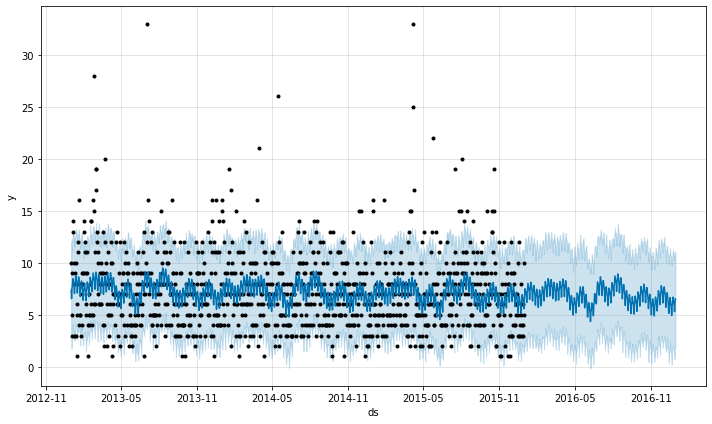

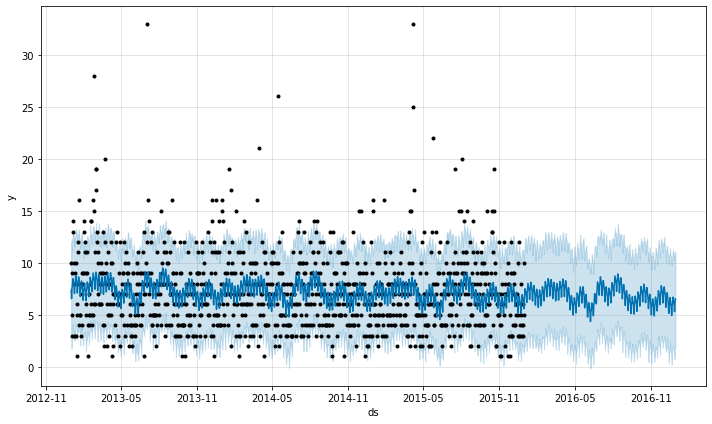

In [39]:
predictions = model.predict(predictions_df)

model.plot(predictions)

## Prophet's inbuilt plotting features

Prophet allows us to plot the existing data alongside its predicted future, as well as plotting the components of the model, using `.plot()` and `.plot_components()` methods.

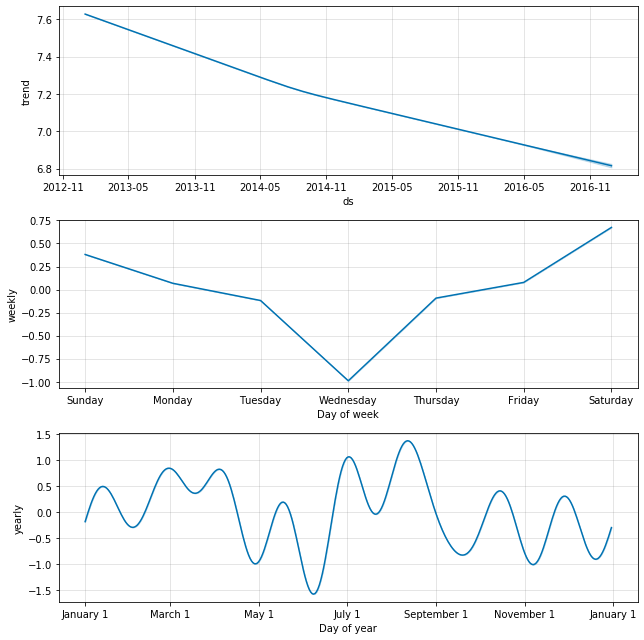

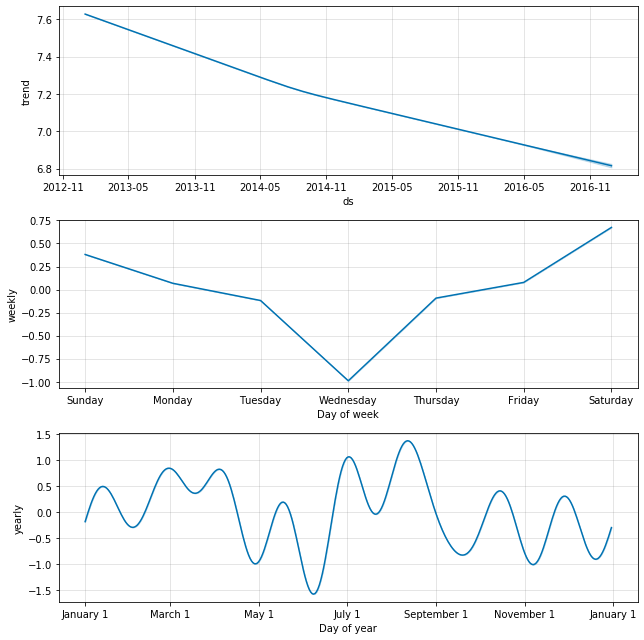

In [40]:
model.plot_components(predictions)

## Let's try a new data set 

If you're worried about processing power, try cutting the dataset in half: 

``` python 

df_power = df_power.iloc[int(df.shape[0]/2)]
```

In [42]:
df_power = pd.read_csv('../data/DOM_hourly.csv', )


In [47]:
df_power

,ds,y
0,2005-05-01 01:00:00,7190.0
1,2005-05-01 02:00:00,6803.0
2,2005-05-01 03:00:00,6583.0
3,2005-05-01 04:00:00,6452.0
4,2005-05-01 05:00:00,6445.0
...,...,...
17515,2007-05-01 00:00:00,9014.0
17516,2007-05-01 01:00:00,8152.0
17517,2007-05-01 02:00:00,7641.0
17518,2007-05-01 03:00:00,7340.0


In [43]:
df_power['ds'] = pd.to_datetime(df_power['ds'])

m = Prophet()

m.fit(df_power)

//Users/davidbeightol/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [44]:
future_df = m.make_future_dataframe((24*100), freq='H')

predictions = m.predict(future_df)

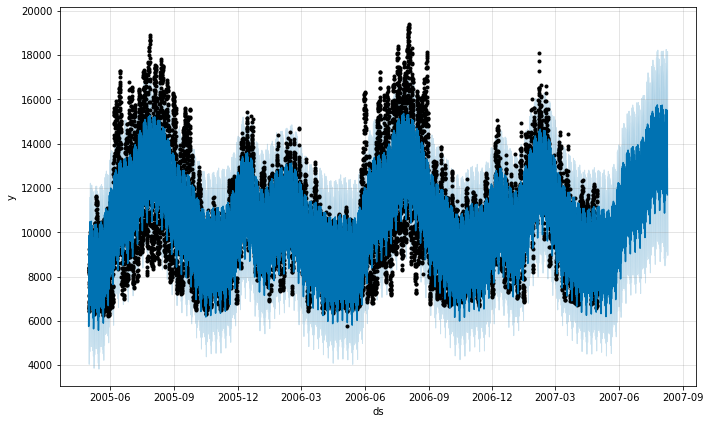

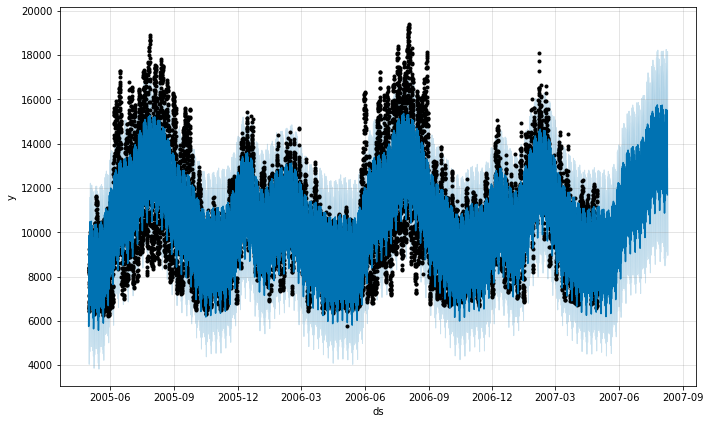

In [50]:
m.plot(predictions)


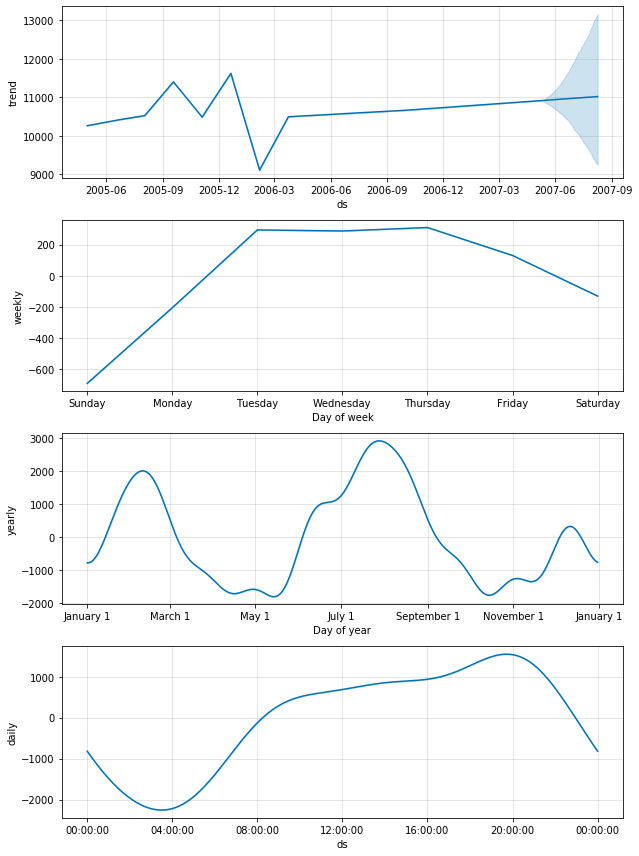

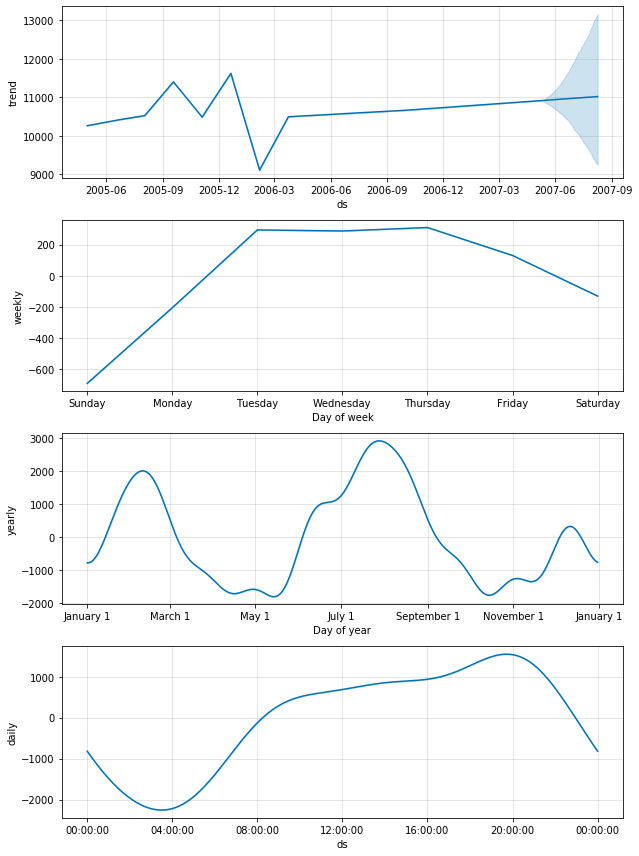

In [46]:
m.plot_components(predictions)
